In [ ]:
import librosa
import numpy as np
import os
import pandas as pd
import csv
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import keras
import tensorflow.keras.layers as layers
import keras
import tensorflow as tf
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Flatten
from keras.optimizers import Adam
from keras.layers import Bidirectional
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import librosa.display

In [ ]:
ragas

['Atana',
 'Husseni',
 'Bilahari',
 'Behag',
 'Bhairavi',
 'Begada',
 'Harikambhoji',
 'Dhanyasi',
 'Kamas',
 'Kalyani',
 '.ipynb_checkpoints']

In [ ]:
columns=['filename','rmse','chroma_stft','spec_cent','spec_bw','rolloff','zcr', 'chroma_cqt', 'chroma_cens', 'pitch', 'magnitude', 'mfcc0','mfcc1','mfcc2','mfcc3','mfcc4','mfcc5','mfcc6','mfcc7','mfcc8','mfcc9','mfcc10','mfcc11','mfcc12','mfcc13','mfcc14','mfcc15','mfcc16','mfcc17','mfcc18','mfcc19','raga']
dataset=pd.DataFrame(columns=columns)
ragas=os.listdir('/content/drive/MyDrive/Audio_data_batch_two_tenragas/')
for raga in ragas:
  path = '/content/drive/MyDrive/Audio_data_batch_two_tenragas/'+raga
  music=os.listdir(path)
  for name in music:
     vocals=path+'/'+name
     songname=vocals
     filename=name
     y, sr = librosa.load(songname, mono=True)
     dur = librosa.get_duration(y=y, sr=sr)
     off=0

     if dur > 300:
        for i in range(60):
          x, sr = librosa.load(songname, mono=True,offset=off,duration=5)
          rmse = librosa.feature.rms(y=x)[0]
          chroma_stft = librosa.feature.chroma_stft(y=x, sr=sr)
          spec_cent = librosa.feature.spectral_centroid(y=x, sr=sr)
          spec_bw = librosa.feature.spectral_bandwidth(y=x, sr=sr)
          rolloff = librosa.feature.spectral_rolloff(y=x, sr=sr)
          zcr = librosa.feature.zero_crossing_rate(x)
          chroma_cqt = librosa.feature.chroma_cqt(y=x, sr=sr)
          chroma_cens = librosa.feature.chroma_cens(x, sr=sr)
          pitch, magnitude = librosa.piptrack(y=x, sr=sr)
          mfcc = librosa.feature.mfcc(y=x, sr=sr)
          filename = name+'-'+str(i+1)
          data=[filename,np.mean(rmse),np.mean(chroma_stft),np.mean(spec_cent),np.mean(spec_bw),np.mean(rolloff),np.mean(zcr), np.mean(chroma_cqt), np.mean(chroma_cens), np.mean(pitch), np.mean(magnitude), np.mean(mfcc[0]),np.mean(mfcc[1]),np.mean(mfcc[2]),np.mean(mfcc[3]),np.mean(mfcc[4]),np.mean(mfcc[5]),np.mean(mfcc[6]),np.mean(mfcc[7]),np.mean(mfcc[8]),np.mean(mfcc[9]),np.mean(mfcc[10]),np.mean(mfcc[11]),np.mean(mfcc[12]),np.mean(mfcc[13]),np.mean(mfcc[14]),np.mean(mfcc[15]),np.mean(mfcc[16]),np.mean(mfcc[17]),np.mean(mfcc[18]),np.mean(mfcc[19]),raga]
          dataseries = pd.Series(data, index = dataset.columns)
          dataset = dataset.append(dataseries, ignore_index=True)
          print(filename+" "+raga+" added" + 'dur '+str(dur))
          if i in range(0,18):
            off=off+5
          if i in range(18,42):
            off=(dur/60)*i
          if i in range(42,60):
            off= dur - ((60-i)*5)

     else:
        for i in range(60):
          x, sr = librosa.load(songname, mono=True,offset=off,duration=(dur/60))
          rmse = librosa.feature.rms(y=x)[0]
          chroma_stft = librosa.feature.chroma_stft(y=x, sr=sr)
          spec_cent = librosa.feature.spectral_centroid(y=x, sr=sr)
          spec_bw = librosa.feature.spectral_bandwidth(y=x, sr=sr)
          rolloff = librosa.feature.spectral_rolloff(y=x, sr=sr)
          zcr = librosa.feature.zero_crossing_rate(x)
          chroma_cqt = librosa.feature.chroma_cqt(y=x, sr=sr)
          chroma_cens = librosa.feature.chroma_cens(x, sr=sr)
          pitch, magnitude = librosa.piptrack(y=x, sr=sr)
          mfcc = librosa.feature.mfcc(y=x, sr=sr)
          filename = name+'-'+str(i+1)
          data=[filename,np.mean(rmse),np.mean(chroma_stft),np.mean(spec_cent),np.mean(spec_bw),np.mean(rolloff),np.mean(zcr), np.mean(chroma_cqt), np.mean(chroma_cens), np.mean(pitch), np.mean(magnitude), np.mean(mfcc[0]),np.mean(mfcc[1]),np.mean(mfcc[2]),np.mean(mfcc[3]),np.mean(mfcc[4]),np.mean(mfcc[5]),np.mean(mfcc[6]),np.mean(mfcc[7]),np.mean(mfcc[8]),np.mean(mfcc[9]),np.mean(mfcc[10]),np.mean(mfcc[11]),np.mean(mfcc[12]),np.mean(mfcc[13]),np.mean(mfcc[14]),np.mean(mfcc[15]),np.mean(mfcc[16]),np.mean(mfcc[17]),np.mean(mfcc[18]),np.mean(mfcc[19]),raga]
          dataseries = pd.Series(data, index = dataset.columns)
          dataset = dataset.append(dataseries, ignore_index=True)
          print(filename+" "+raga+" added(small)"+'dur '+str(dur))
          off=(dur/60)*(i)


In [ ]:
dataset.to_csv('/content/drive/MyDrive/dataset_numerical.csv')

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/dataset_numerical.csv')

In [ ]:
dataset = dataset.iloc[:,1:]
dataset

,rmse,chroma_stft,spec_cent,spec_bw,rolloff,zcr,chroma_cqt,chroma_cens,pitch,magnitude,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,raga
0,0.057366,0.356611,2183.682133,1780.648831,3986.282466,0.140616,0.492778,0.256367,44.478590,0.153732,...,-1.733105,-16.346844,0.874510,-13.704234,2.395827,-7.479352,4.306929,-3.065522,1.189445,Atana
1,0.057366,0.356611,2183.682133,1780.648831,3986.282466,0.140616,0.492778,0.256367,44.478590,0.153732,...,-1.733105,-16.346844,0.874510,-13.704234,2.395827,-7.479352,4.306929,-3.065522,1.189445,Atana
2,0.045101,0.335154,2191.948609,1882.385940,4128.681124,0.121385,0.502560,0.258486,51.529694,0.124144,...,-2.906332,-19.232302,2.644198,-8.861922,4.111287,-8.656278,1.130446,-5.798039,4.454081,Atana
3,0.050455,0.326019,2290.723664,2029.661187,4393.032250,0.113223,0.463401,0.249078,42.827540,0.116326,...,-2.749416,-16.497883,5.133832,-4.118744,2.058335,-8.573431,2.562922,-6.766419,5.567653,Atana
4,0.057464,0.326608,2087.394416,1960.729518,4017.391733,0.104619,0.454887,0.255232,38.608948,0.129651,...,-5.762924,-17.382010,2.135570,-6.119337,-0.078345,-7.636397,0.175586,-7.397060,3.225068,Atana
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7015,0.097432,0.317149,1754.602958,1918.453709,3433.947754,0.084606,0.490674,0.267046,28.553642,0.196119,...,0.740640,-5.377279,3.935313,-4.054419,4.189030,-9.741838,5.253448,-5.747349,9.262256,Kamas
7016,0.097974,0.321211,1647.816602,1869.809375,3287.352498,0.070005,0.516645,0.263180,18.540722,0.155699,...,3.695419,-2.310949,3.914522,-6.962498,8.161569,-9.814953,6.194836,-0.395112,7.832188,Kamas
7017,0.114012,0.274262,1603.899649,1880.668749,3205.107625,0.066210,0.464219,0.259386,14.860678,0.176293,...,-2.232171,-6.254406,5.547446,-7.962134,5.380286,-6.550309,5.086761,-2.658207,7.786462,Kamas
7018,0.087043,0.287376,1511.516391,1845.574030,2879.019165,0.061951,0.394952,0.240729,14.829134,0.159679,...,1.461459,-6.077775,4.192875,-8.894011,3.227394,-7.180505,2.713308,-6.913095,3.807134,Kamas


In [ ]:
raga_list = dataset.iloc[:, -1]
encoder = LabelEncoder()
Y = encoder.fit_transform(raga_list)
#Scaling the Feature columns
scaler = StandardScaler()
X = scaler.fit_transform(np.array(dataset.iloc[:, :-1], dtype = float))

# 1D CNN


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1)
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
input_shape = (X_train.shape[1], X_train.shape[2])

In [ ]:
model = tf.keras.Sequential()
model.add(layers.Conv1D(128,3, activation = "relu",padding = 'same', input_shape=input_shape))
model.add(tf.keras.layers.BatchNormalization())
model.add(layers.Conv1D(256,3,activation = 'relu',padding = 'same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(layers.Conv1D(512,3,activation = 'relu',padding = 'same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512,activation = 'relu'))
model.add(layers.Dense(256,activation = 'relu'))
model.add(layers.Dense(128,activation = 'relu'))
model.add(layers.Dense(64,activation = 'relu'))
model.add(layers.Dense(10,activation = 'softmax'))
model.summary()

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
bs = 32

In [ ]:
# Early Stopping
early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=10,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
)
classifier = model.fit(X_train,
                       y_train,
                       callbacks = [early_stopping_callback],
                       batch_size = bs,
                       epochs=100, 
                       validation_data=(X_test,y_test)
                       )

In [ ]:
Y_pred_cnn = model.predict(X_test)

In [ ]:
np.save('/content/drive/MyDrive/Y_pred_cnn2.npy', Y_pred_cnn)
np.save('/content/drive/MyDrive/Y_test_cnn2.npy', y_test)

In [ ]:
Y_pred_cnn = tf.math.argmax(Y_pred_cnn, axis=1)

In [ ]:
Y_pred_cnn = np.load('/content/drive/MyDrive/Y_pred_cnn2.npy')
Y_test_cnn = np.load('/content/drive/MyDrive/Y_test_cnn2.npy')

In [ ]:
import pandas as pd
Y_pred_cnn = pd.DataFrame(Y_pred_cnn)
Y_test_cnn = pd.DataFrame(Y_test_cnn)
Y_pred_cnn.columns = ['predicted']
Y_test_cnn.columns = ['true']

In [ ]:
cm_cnn = pd.crosstab(Y_pred_cnn['predicted'], Y_test_cnn['true'])

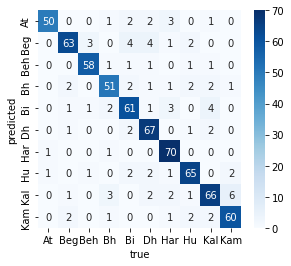

In [ ]:
import seaborn as sn
fig = plt.figure(figsize = (10, 4))
ax1 = plt.subplot(121)
sn.heatmap(cm_cnn, annot= True, cmap= 'Blues')

# LSTM


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1)
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
input_shape = (X_train.shape[1], X_train.shape[2])

In [ ]:
model = tf.keras.Sequential()
adam1 = Adam(learning_rate=0.0009)
model.add(LSTM(units=128, dropout=0.05, recurrent_dropout=0.25, return_sequences=True,input_shape=input_shape))
model.add(LSTM(units=64,  dropout=0.05, recurrent_dropout=0.25, return_sequences=True))
model.add(Flatten())
model.add(Dense(units=10, activation="softmax"))

In [ ]:
model.compile(loss="sparse_categorical_crossentropy", optimizer=adam1, metrics=["accuracy"],)
model.summary()

bs= 32

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 128)            81408     
                                                                 
 lstm_1 (LSTM)               (None, 1, 64)             49408     
                                                                 
 flatten_1 (Flatten)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 131,466
Trainable params: 131,466
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Early Stopping
early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=10,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
)
classifier = model.fit(X_train,
                       y_train,
                       callbacks = [early_stopping_callback],
                       batch_size = bs,
                       epochs=100, 
                       validation_data=(X_test,y_test)
                       )

In [ ]:
Y_pred_lstm = model.predict(X_test)

22/22 [==============================] - 0s 2ms/step


In [ ]:
Y_pred_lstm = np.load('/content/drive/MyDrive/Y_pred_lstm.npy')
Y_test_lstm = np.load('/content/drive/MyDrive/Y_test_lstm.npy')

In [ ]:
import pandas as pd
Y_pred_lstm = tf.math.argmax(Y_pred_lstm, axis=1)
Y_pred_lstm = pd.DataFrame(Y_pred_lstm)
Y_test_lstm = pd.DataFrame(Y_test_lstm)
Y_pred_lstm.columns = ['predicted']
Y_test_lstm.columns = ['true']

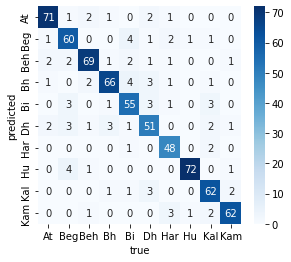

In [ ]:
import pandas as pd
cm_lstm = pd.crosstab(Y_pred_lstm['predicted'], Y_test_lstm['true'])
import seaborn as sn
fig = plt.figure(figsize = (10, 4))
ax1 = plt.subplot(121)
sn.heatmap(cm_lstm, annot= True, cmap= 'Blues')

# ANN

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1)

In [ ]:
model = tf.keras.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               15872     
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 10)                650       
                                                                 
Total params: 189,002
Trainable params: 189,002
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Early Stopping
early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=5,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
)
classifier = model.fit(X_train,
                       y_train,
                       callbacks = [early_stopping_callback],
                       batch_size = 32,
                       epochs=100, 
                       validation_data=(X_test,y_test)
                       )

In [ ]:
Y_pred_ann = model.predict(X_test)

22/22 [==============================] - 0s 2ms/step


In [ ]:
Y_pred_ann = np.load('/content/drive/MyDrive/Y_pred_ann.npy')
Y_test_ann = np.load('/content/drive/MyDrive/Y_test_ann.npy')

In [ ]:
import pandas as pd
Y_pred_ann = tf.math.argmax(Y_pred_ann, axis=1)
Y_pred_ann = pd.DataFrame(Y_pred_ann)
Y_test_ann = pd.DataFrame(Y_test_ann)
Y_pred_ann.columns = ['predicted']
Y_test_ann.columns = ['true']

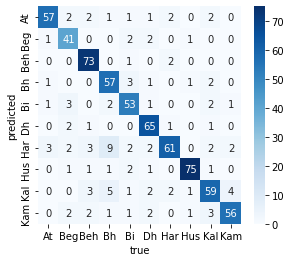

In [ ]:
cm_ann = pd.crosstab(Y_pred_ann['predicted'], Y_test_ann['true'])
import seaborn as sn
fig = plt.figure(figsize = (10, 4))
ax1 = plt.subplot(121)
sn.heatmap(cm_ann, annot= True, cmap= 'Blues')